In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
# Funktion zum Laden und Vorbereiten der Daten
def load_and_prepare_data(train_url, test_url):
    # Daten von Google Drive lesen
    train_df = pd.read_csv(train_url)
    test_df = pd.read_csv(test_url)

    # Daten normalisieren und in das richtige Format bringen
    X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
    y_train = to_categorical(train_df.iloc[:, 0].values, num_classes=10)

    X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
    y_test = to_categorical(test_df.iloc[:, 0].values, num_classes=10)

    return X_train, X_test, y_train, y_test

# Download-URLs zu den freigegebenen Dateien (Datensatz) auf Google Drive
train_url = 'https://drive.google.com/uc?id=1MrBx4UAjnbtjtydNHsePFnusSy9i2gmR&export=download'
test_url = 'https://drive.google.com/uc?id=1YM0mYy_GAvDLIQuxuTxBCh7_WpdkbVw4&export=download'

# Laden und Vorbereiten der Daten
X_train, X_test, y_train, y_test = load_and_prepare_data(train_url, test_url)

# Überprüfen der Daten
print("Trainingsdaten:", X_train.shape, y_train.shape)
print("Testdaten:", X_test.shape, y_test.shape)


Trainingsdaten: (0, 28, 28, 1) (0, 10)
Testdaten: (10000, 28, 28, 1) (10000, 10)


In [9]:
# Laden des trainierten Modells
model = load_model('best_model.h5')

# Laden der Trainingshistorie
history_df = pd.read_csv('training_history.csv')

In [10]:
# Modell bewerten
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.8983
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.85      0.85      1000
           3       0.87      0.94      0.90      1000
           4       0.85      0.81      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.69      0.70      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix:
[[836   2  12  41   1   1 104   0   3   0]
 [  2 984   0  12   1   0   1   0   0   0]
 [ 13   0 847  11  47   0  82   0   0   0]
 [ 11   5   5

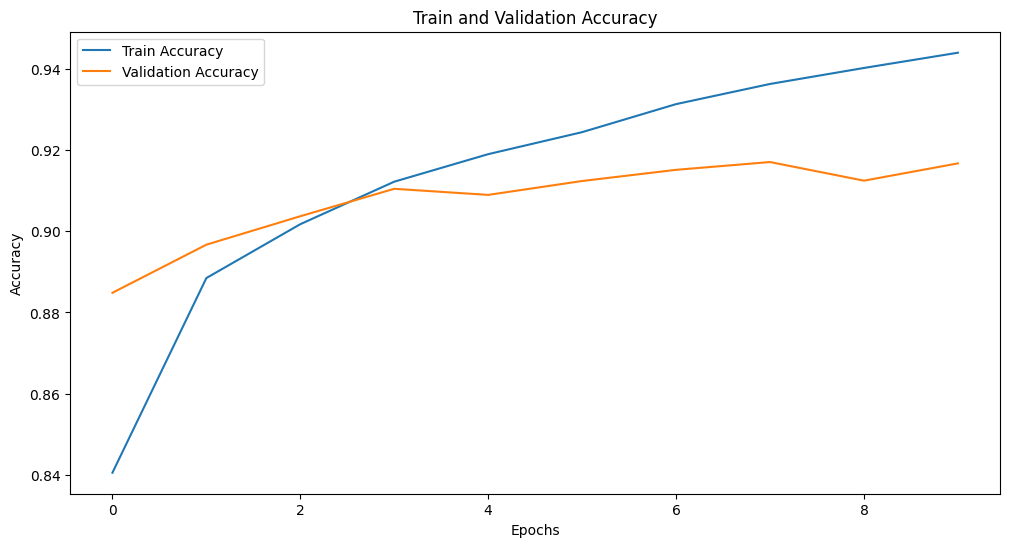

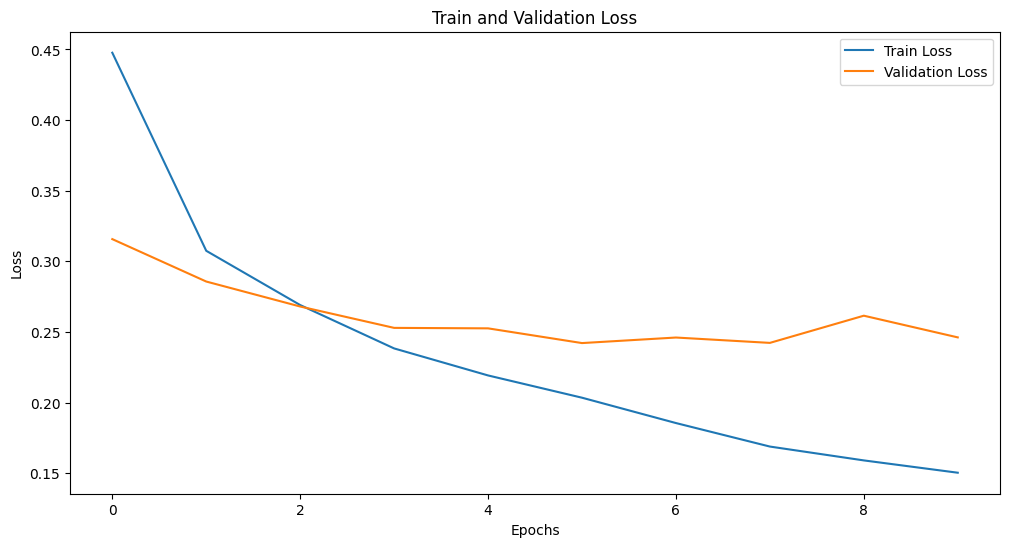

In [11]:
# Visualisieren der Trainingshistorie
plt.figure(figsize=(12, 6))
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8974 - loss: 0.2823
Test Loss: 0.2790083885192871
Test Accuracy: 0.8982999920845032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: T-Shirt/Top (0)
Actual class: T-Shirt/Top (0)


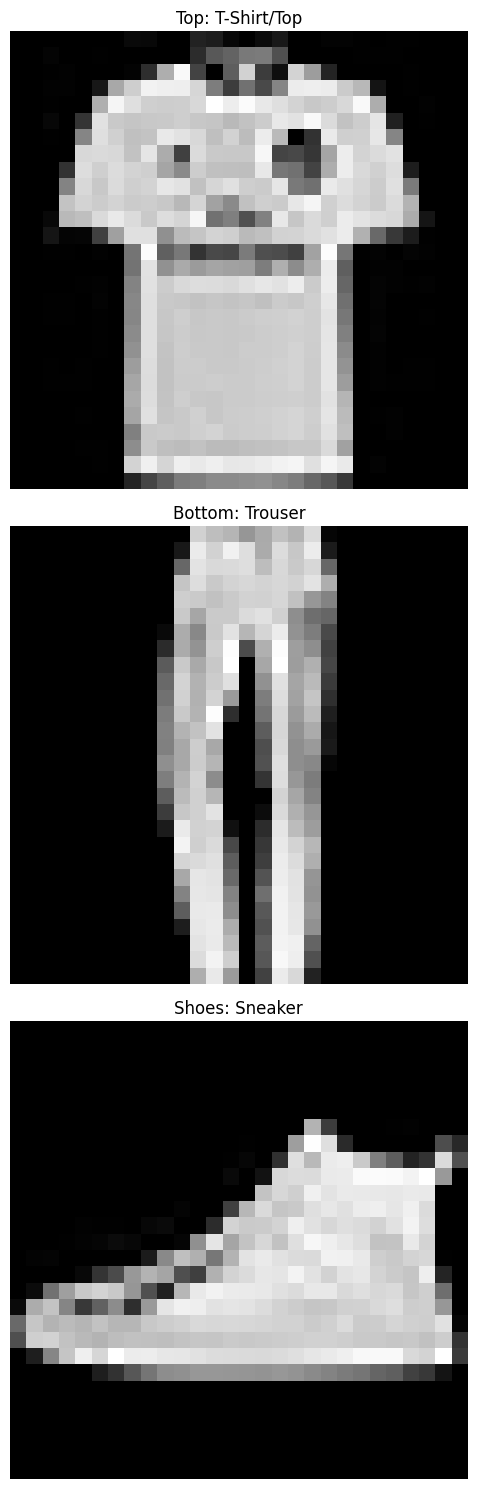

In [6]:
# Evaluieren des Modells
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Vorhersagebeispiel: Outfit
def display_outfit_prediction(model, X_test, y_test, index):
    category_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
                      'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    prediction = model.predict(np.expand_dims(X_test[index], axis=0))
    predicted_class = np.argmax(prediction, axis=1)[0]
    actual_class = np.argmax(y_test[index])

    print(f'Predicted class: {category_names[predicted_class]} ({predicted_class})')
    print(f'Actual class: {category_names[actual_class]} ({actual_class})')

    top_classes = [0, 2, 3, 6]
    bottom_classes = [1]
    shoe_classes = [5, 7, 9]
    accessory_classes = [8]

    outfit = {}

    if predicted_class in top_classes:
        outfit['Top'] = predicted_class
        if predicted_class == 3:
            outfit['Accessory'] = np.random.choice(accessory_classes)
        else:
            outfit['Bottom'] = np.random.choice(bottom_classes)
    elif predicted_class in bottom_classes:
        outfit['Bottom'] = predicted_class
        outfit['Top'] = np.random.choice(top_classes)
    elif predicted_class in shoe_classes:
        outfit['Shoes'] = predicted_class

    if 'Shoes' not in outfit:
        outfit['Shoes'] = np.random.choice(shoe_classes)

    fig, axs = plt.subplots(len(outfit), 1, figsize=(5, 15))

    for i, (key, value) in enumerate(outfit.items()):
        outfit_index = np.where(np.argmax(y_test, axis=1) == value)[0][0]
        axs[i].imshow(X_test[outfit_index].reshape(28, 28), cmap='gray')
        axs[i].set_title(f'{key}: {category_names[value]}')
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

display_outfit_prediction(model, X_test, y_test, index=0)
